In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def result(file_path, nodes_num, init_energy):
    # 1. Read CSV file ===
    filename = file_path
    df = pd.read_csv(filename)

    # Ensure necessary columns exist
    required_cols = ['round', 'avg_RE', 'EC', 'PDR', 'CA', 'LB', 'FI']
    for col in required_cols:
        if col not in df.columns:
            print(f"Warning: Column '{col}' not found in file.")

    # 2. Extract / compute metrics ===
    N = nodes_num  
    E_init = init_energy  

    # Recompute main metrics using given formulas
    E_total_init = N * E_init
    E_total_remain = df['avg_RE'] * N
    EC = E_total_init - E_total_remain  # (9)
    avg_RE = E_total_remain / N         # (10)
    FI = (E_total_remain**2) / (N * (E_total_remain**2))  # simplified if no per-node energy
    LB1 = df['LB'].mean()  
    LB = df['LB']                    # (12)

        
    df_10 = df[df['round'] <= 2000]
    avg_CA = df_10['CA'].mean()                      
    CA1 = avg_CA                        # (13)
    CA = df['CA']
    PDR = df['PDR']                     # (14)
    PLR = 1 - PDR                       # (15)

    # 3. Print latest metric values ===
    print("\nNetwork Metrics (last round)")
    print(f"Energy Consumption (EC): {EC.iloc[-1]:.4f} J")
    print(f"Average Residual Energy (avg_RE): {avg_RE.iloc[-1]:.4f} J")
    print(f"Fairness Index (FI): {FI.iloc[-1]:.4f}")
    print(f"Load Balance (LB): {LB1:.4f}")
    print(f"Coverage Area (CA): {CA1:.4f}")
    print(f"Packet Delivery Ratio (PDR): {PDR.iloc[-1]:.4f}")
    print(f"Packet Loss Ratio (PLR): {PLR.iloc[-1]:.4f}")

    # 4. Sampling every 50 rounds ===
    interval = 50
    df_sampled = df[df['round'] % interval == 0].copy()

    # 5. Plot metrics ===
    metrics = {
        "Energy Consumption (EC)": EC,
        "Average Residual Energy (avg_RE)": avg_RE,
        "Fairness Index (FI)": FI,
        "Load Balance (LB)": LB,
        "Coverage Area (CA)": CA,
        "Packet Delivery Ratio (PDR)": PDR,
        "Packet Loss Ratio (PLR)": PLR
    }

    plt.figure(figsize=(15, 10))
    for i, (name, values) in enumerate(metrics.items(), 1):
        plt.subplot(3, 3, i)
        plt.plot(df['round'], values, 'b-', marker='o', markevery=interval//10, linewidth=1.3)
        plt.title(name, fontsize=10)
        plt.xlabel("Round")
        plt.ylabel(name)
        plt.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()


Network Metrics (last round)
Energy Consumption (EC): 190.1093 J
Average Residual Energy (avg_RE): 0.0495 J
Fairness Index (FI): 0.0050
Load Balance (LB): 0.9082
Coverage Area (CA): 0.7126
Packet Delivery Ratio (PDR): 0.9629
Packet Loss Ratio (PLR): 0.0371


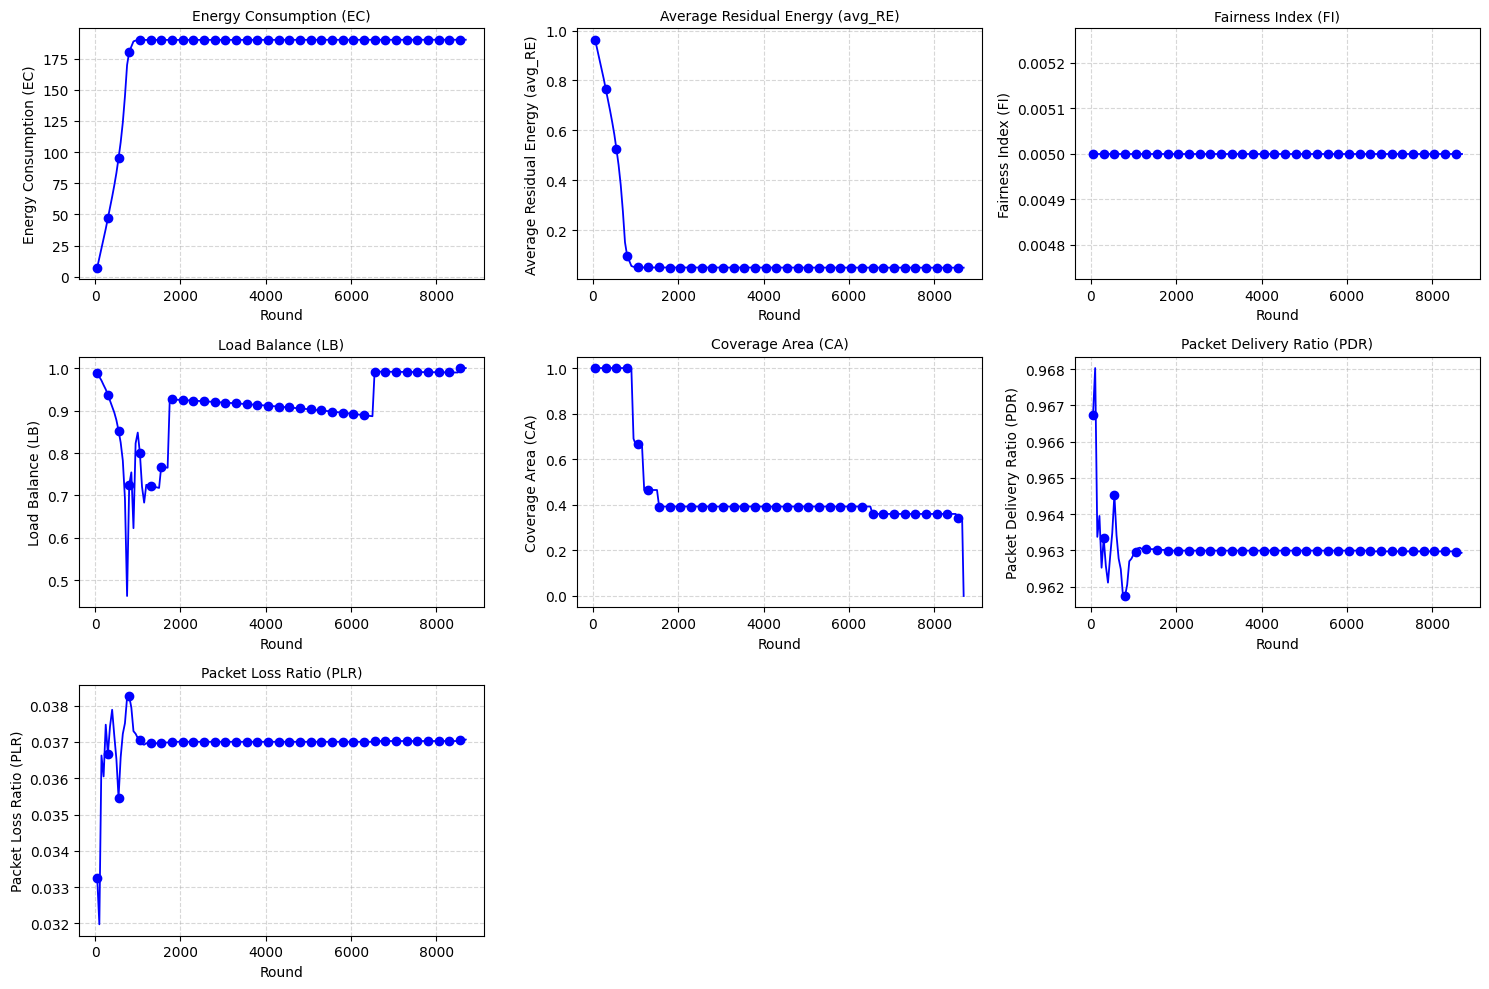

In [2]:
result(r"D:\Papers\DCHPC\DCHPC\AMobile_sink_pattern\detailed_wsn_adaptive_results.csv", 200, 1)


Network Metrics (last round)
Energy Consumption (EC): 95.0448 J
Average Residual Energy (avg_RE): 0.0496 J
Fairness Index (FI): 0.0100
Load Balance (LB): 0.8929
Coverage Area (CA): 0.7321
Packet Delivery Ratio (PDR): 0.9626
Packet Loss Ratio (PLR): 0.0374


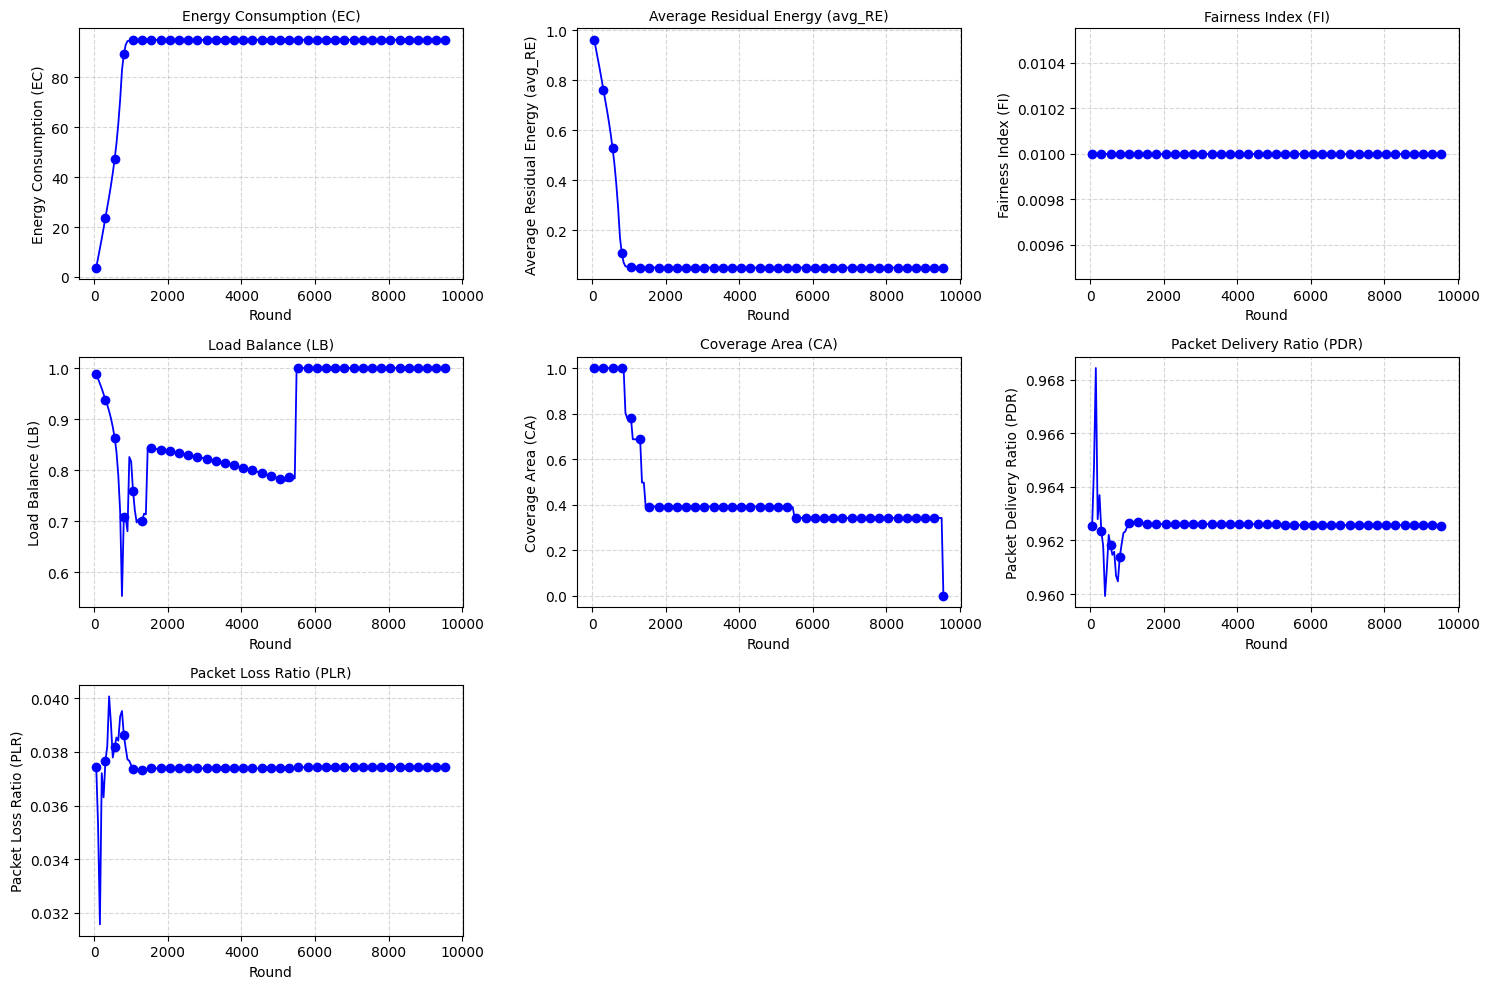

In [3]:
result(r"D:\Papers\DCHPC\DCHPC\AMobile_sink_pattern\detailed_wsn_eeosp_results.csv", 100, 1)


Network Metrics (last round)
Energy Consumption (EC): 190.1417 J
Average Residual Energy (avg_RE): 0.0493 J
Fairness Index (FI): 0.0050
Load Balance (LB): 0.9200
Coverage Area (CA): 0.6227
Packet Delivery Ratio (PDR): 0.9634
Packet Loss Ratio (PLR): 0.0366


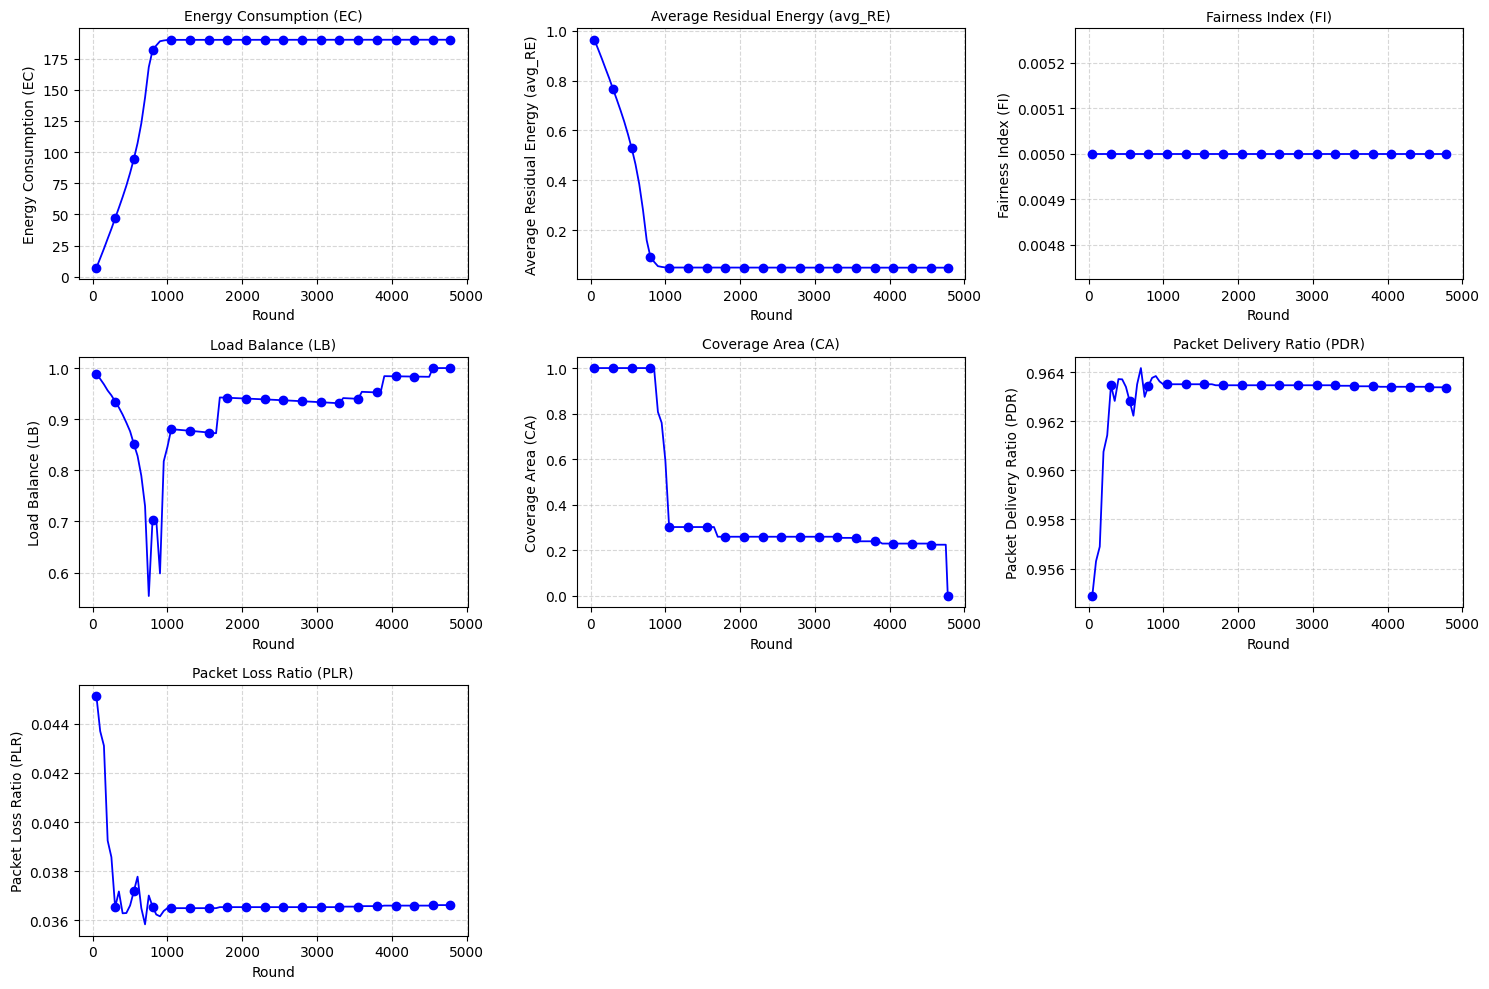

In [4]:
result(r"D:\Papers\DCHPC\DCHPC\AMobile_sink_pattern\detailed_wsn_fixed_results.csv", 200, 1)


Network Metrics (last round)
Energy Consumption (EC): 190.1811 J
Average Residual Energy (avg_RE): 0.0491 J
Fairness Index (FI): 0.0050
Load Balance (LB): 0.8603
Coverage Area (CA): 0.7586
Packet Delivery Ratio (PDR): 0.9466
Packet Loss Ratio (PLR): 0.0534


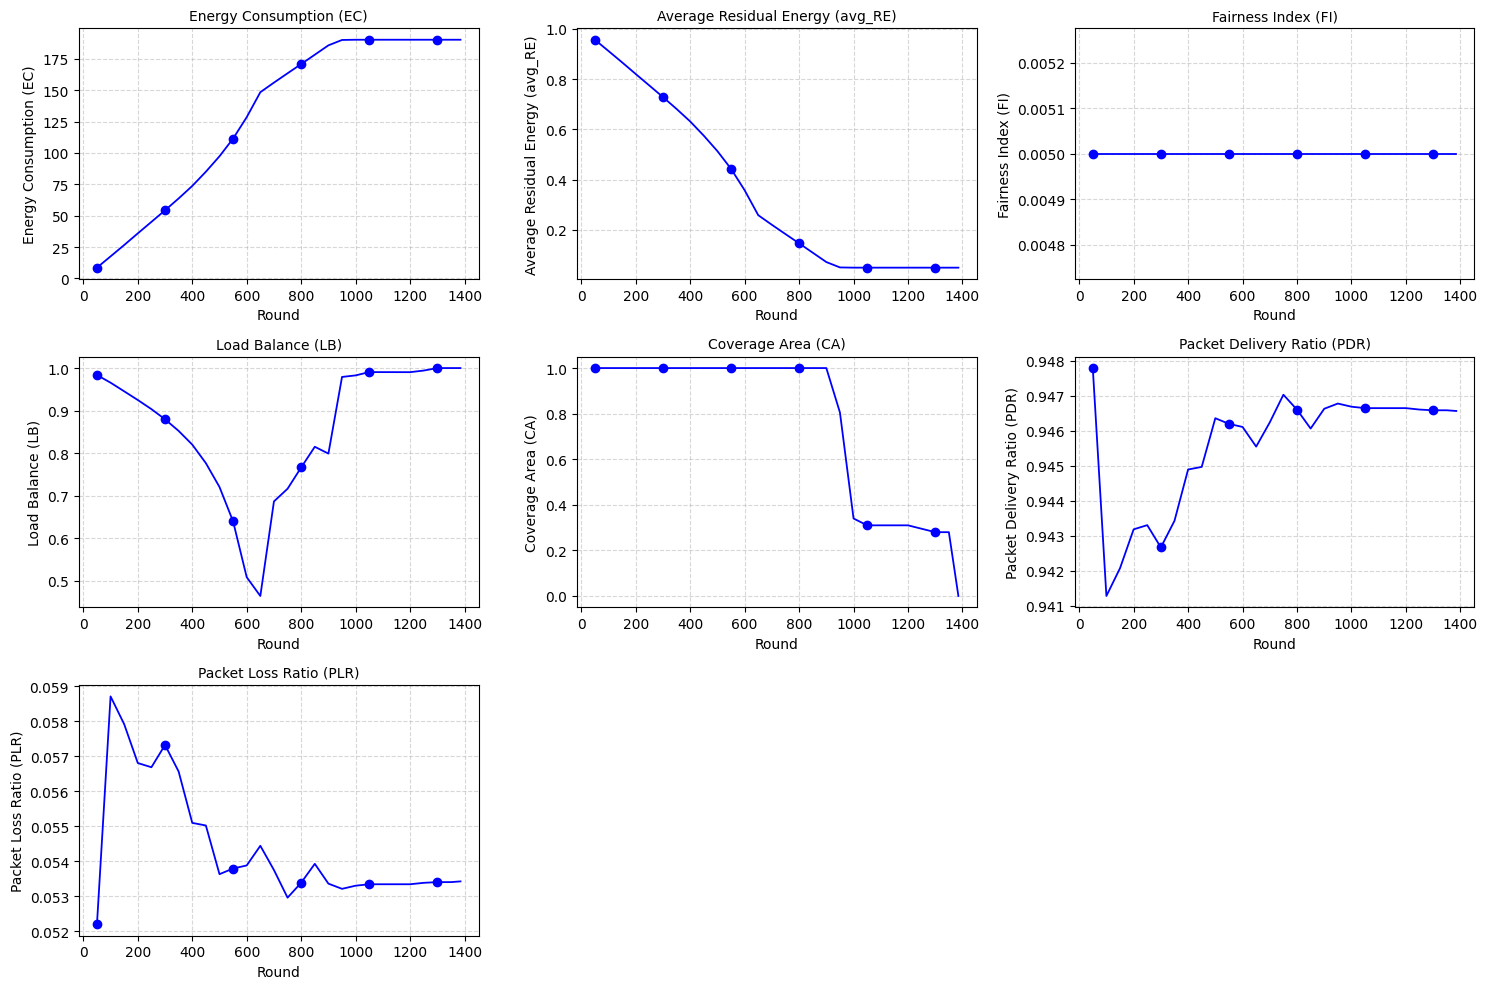

In [5]:
result(r"D:\Papers\DCHPC\DCHPC\AMobile_sink_pattern\detailed_wsn_random_results.csv", 200, 1)